In [1]:
import csv
import pandas as pd
from numpy import array
import numpy as np

import csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from statistics import mean
from datetime import date
import datetime
import os
from sklearn.utils import check_array as check_arrays
import matplotlib.pyplot as plt

In [2]:

#loading important libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

identify = 'SARIMA1'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify

#os.mkdir(folder_name)

list_of_test_songs = ['Katy Perry - Never Really Over' , 
              #'Taylor Swift - You Need To Calm Down', 
              #'Shawn Mendes & Camila Cabello - SeÃ±orita', 
              #'Ava Max - So Am I', 
              #'Andreas Bourani - Auf uns', 
              #'Meduza feat. Goodboys - Piece Of Your Heart', 
              #'Pietro Lombardi - Nur Ein Tanz', 
              #'Loud Luxury feat. brando - Body', 
              #'Mark Forster - Sowieso', 
              #'Camila Cabello feat. Young Thug - Havana',  
                ] 

# Select dataset of the right cluster and test song

# Never Really Over
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster5DailyPlaysNeverReallyOver.csv', sep=';', index_col=0, decimal=',')
df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster5WeeklyPlaysNeverReallyOver.csv', sep=';', index_col=0, decimal=',')

# You Need To Calm Down
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster5DailyPlaysYouNeedToCalmDown.csv', sep=';', index_col=0, decimal=',')
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster5WeeklyPlaysYouNeedToCalmDown.csv', sep=';', index_col=0, decimal=',')

#'Shawn Mendes & Camila Cabello - SeÃ±orita' 
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster4DailyPlaysSeniorita.csv', sep=';', index_col=0, decimal=',')
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster4WeeklyPlaysSeniorita.csv', sep=';', index_col=0, decimal=',')

#'Ava Max - So Am I'
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster4DailyPlaysSoAmI.csv', sep=';', index_col=0, decimal=',')
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster4WeeklyPlaysSoAmI.csv', sep=';', index_col=0, decimal=',')

#'Andreas Bourani - Auf uns' 
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster3DailyPlaysAufUns.csv', sep=';', index_col=0, decimal=',')
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster3WeeklyPlaysAufUns.csv', sep=';', index_col=0, decimal=',')


#'Meduza feat. Goodboys - Piece Of Your Heart'
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster3DailyPlaysPieceOfYourHeart.csv', sep=';', index_col=0, decimal=',')
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster3WeeklyPlaysPieceOfYourHeart.csv', sep=';', index_col=0, decimal=',')

#'Pietro Lombardi - Nur Ein Tanz'
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster2DailyPlaysNurEinTanz.csv', sep=';', index_col=0, decimal=',')
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster2WeeklyPlaysNurEinTanz.csv', sep=';', index_col=0, decimal=',')


#'Loud Luxury feat. brando - Body'
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster2DailyPlaysBody.csv', sep=';', index_col=0, decimal=',')
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster2WeeklyPlaysBody.csv', sep=';', index_col=0, decimal=',')

#'Mark Forster - Sowieso'
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster1DailyPlaysSowieso.csv', sep=';', index_col=0, decimal=',')
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster1WeeklyPlaysSowieso.csv', sep=';', index_col=0, decimal=',')

#'Camila Cabello feat. Young Thug - Havana'
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster1DailyPlaysHavana.csv', sep=';', index_col=0, decimal=',')
#df = pd.read_csv('datasets/96songs/SARIMA_5clusters/cluster1WeeklyPlaysHavana.csv', sep=';', index_col=0, decimal=',')

# Set dataset range
df_range = '23'
df = df.loc[:, :df_range]

number_of_songs = len(df.index)

df


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Ariana Grande - 7 rings,2107,2470,3145,3258,3393,3328,3038,3078,2877,2396,...,1875,1681,1337,1104,1252,1303,1412,1352,1201,1095
Bausa - Was Du Liebe nennst,88,619,1052,1737,2770,3190,3164,3465,3653,3496,...,3586,3439,3591,3249,3083,3039,3108,2892,2406,2219
"Lady Gaga, Bradley Cooper - Shallow",509,893,1353,1665,2098,2491,2914,3537,3924,4264,...,5542,5699,5491,5544,4860,4269,4577,4328,4406,3866
"Lauv & Anne-Marie - Fuck, I'm Lonely",848,1506,2321,2768,3541,4165,3562,3617,3532,3326,...,2989,2624,1605,1337,1010,988,834,539,469,454
"Lotte & Max Giesinger - Auf das, was da noch kommt",1177,2050,3275,3949,4048,4485,4692,5296,5302,5426,...,5471,5275,5111,4197,3867,3836,4141,3953,3803,3795
Mark Forster - Einmal,1634,2269,2870,3460,3645,3614,4272,4925,4993,5786,...,6284,6172,5737,5188,4677,3665,3378,3097,2534,2381
Sam Smith - How Do You Sleep?,1217,2122,2939,3266,3730,3679,3930,3842,4250,4464,...,4226,3740,3801,3464,3076,2570,2439,1850,1530,1632
Taylor Swift feat. Brendon Urie - Me!,2017,3923,5168,6064,6447,6832,7042,6792,6646,6078,...,4165,3132,2603,2111,1875,1542,1260,1178,1138,1118
Tim Bendzko - Keine Maschine,1335,2092,2501,2640,2775,2584,2996,4340,4243,4423,...,4222,3878,3887,3610,3449,3267,3041,1782,1472,1390
Wincent Weiss - Hier mit dir,753,1132,1586,2521,3444,3750,3801,3768,3918,4127,...,4620,4485,4714,4718,4377,4645,4614,4432,4209,3667


In [3]:

my_list = df.values.tolist()

flat_list = [item for sublist in my_list for item in sublist]

# Days to remove from the test song
# Predict until day 112
#n = 48

# Predict until day 140
#n = 20

#flat_list = flat_list[:-n or None]

print('One Long Time Series')
print(len(flat_list))
print(flat_list)

One Long Time Series
276
[2107, 2470, 3145, 3258, 3393, 3328, 3038, 3078, 2877, 2396, 2223, 2164, 2013, 1875, 1681, 1337, 1104, 1252, 1303, 1412, 1352, 1201, 1095, 88, 619, 1052, 1737, 2770, 3190, 3164, 3465, 3653, 3496, 3595, 3492, 3425, 3586, 3439, 3591, 3249, 3083, 3039, 3108, 2892, 2406, 2219, 509, 893, 1353, 1665, 2098, 2491, 2914, 3537, 3924, 4264, 4322, 4886, 5288, 5542, 5699, 5491, 5544, 4860, 4269, 4577, 4328, 4406, 3866, 848, 1506, 2321, 2768, 3541, 4165, 3562, 3617, 3532, 3326, 3520, 3341, 3159, 2989, 2624, 1605, 1337, 1010, 988, 834, 539, 469, 454, 1177, 2050, 3275, 3949, 4048, 4485, 4692, 5296, 5302, 5426, 5430, 5511, 5510, 5471, 5275, 5111, 4197, 3867, 3836, 4141, 3953, 3803, 3795, 1634, 2269, 2870, 3460, 3645, 3614, 4272, 4925, 4993, 5786, 6160, 5913, 5680, 6284, 6172, 5737, 5188, 4677, 3665, 3378, 3097, 2534, 2381, 1217, 2122, 2939, 3266, 3730, 3679, 3930, 3842, 4250, 4464, 4609, 4661, 4411, 4226, 3740, 3801, 3464, 3076, 2570, 2439, 1850, 1530, 1632, 2017, 3923, 5168, 6

In [4]:
# Split into Train and Test
n_steps_in = 4
number_of_total_days = 23
n_steps_out = number_of_total_days - n_steps_in


train_input = array(flat_list[:-n_steps_out or None])
test_output = array(flat_list[-n_steps_out or None:])


list_for_df = flat_list[:-n_steps_out or None]
lenght = len(list_for_df)

df = pd.DataFrame(list_for_df)
df = df[0]

print('lenght', lenght)
#print(df)

np.savetxt('cluster1_'+'Havana_train.csv', train_input, delimiter=",", fmt='%d')
np.savetxt('cluster1_'+'Havana_test.csv', test_output, delimiter=",", fmt='%d')

lenght 257


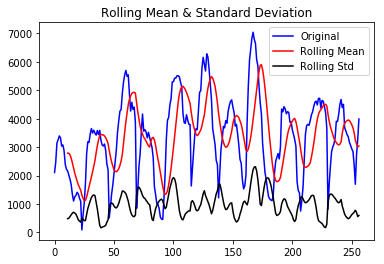

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.215564e+00
p-value                        5.376514e-08
#Lags Used                     6.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(6, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 10 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

test_stationarity(df)



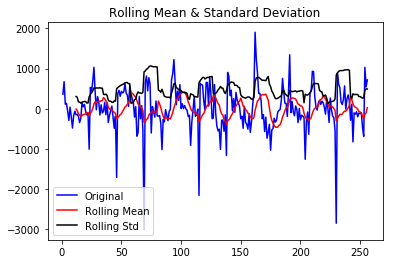

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -7.151406e+00
p-value                        3.134197e-10
#Lags Used                     1.000000e+01
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64


In [6]:
# Differencing before testing stationany
first_diff = df - df.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

/Users/clausholm/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


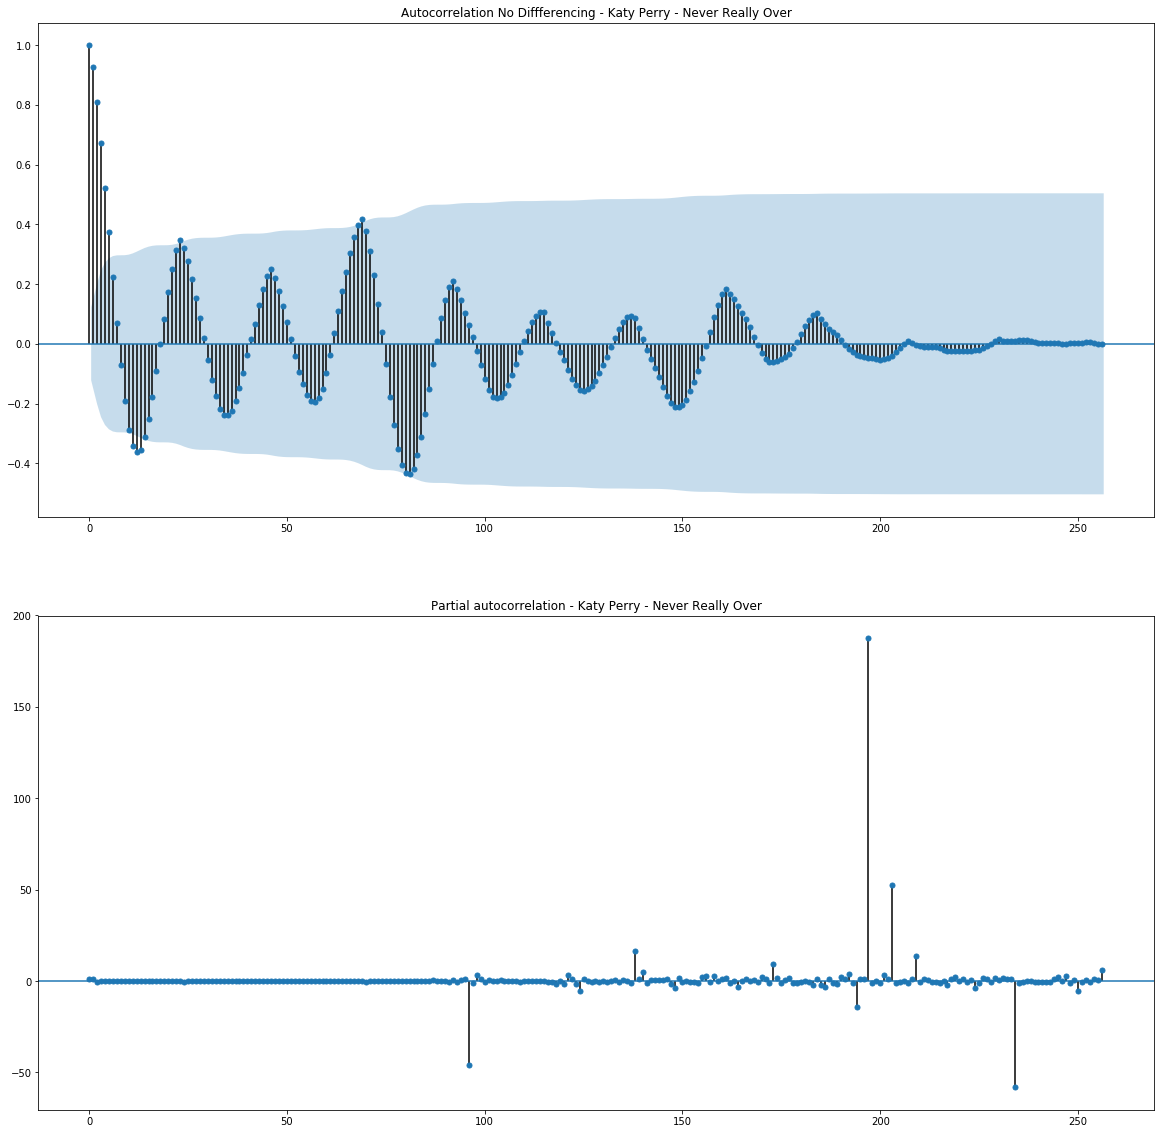

In [7]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=lenght-1, ax=ax1, title=('Autocorrelation No Diffferencing - '+str(list_of_test_songs[0])))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=lenght-1, ax=ax2, title=('Partial autocorrelation - '+str(list_of_test_songs[0])))



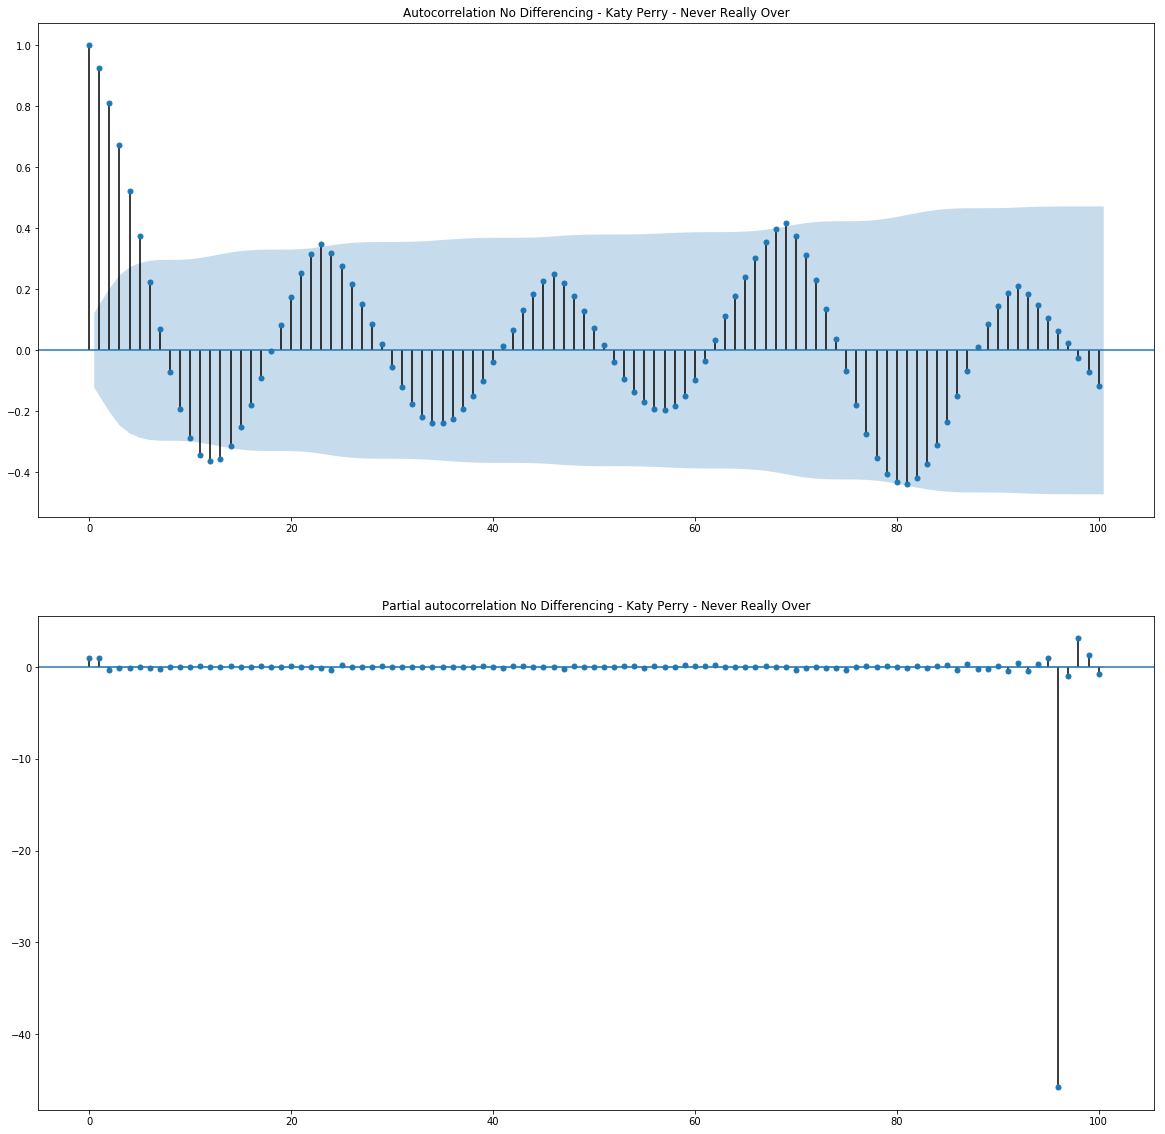

In [8]:
#fig_size = 10
#plt.ylim((0,fig_size))
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=100, ax=ax1, title=('Autocorrelation No Differencing - '+str(list_of_test_songs[0])))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=100, ax=ax2, title=('Partial autocorrelation No Differencing - '+str(list_of_test_songs[0])))

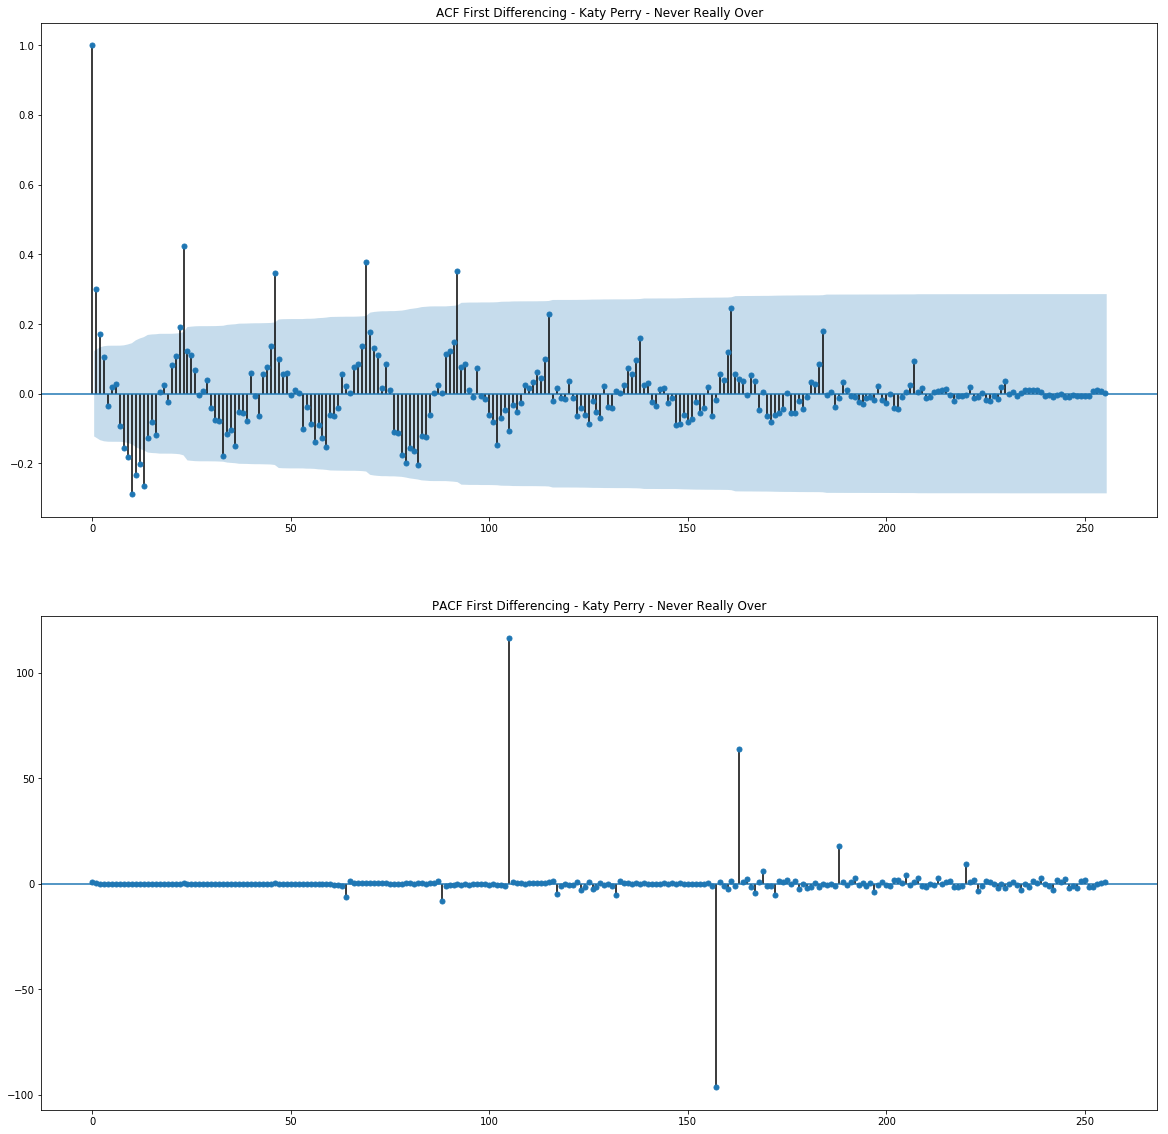

In [9]:
# Uncomment if non-stationary

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=lenght-2, ax=ax1, title=('ACF First Differencing - '+str(list_of_test_songs[0])))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=lenght-2, ax=ax2, title=('PACF First Differencing - '+str(list_of_test_songs[0])))

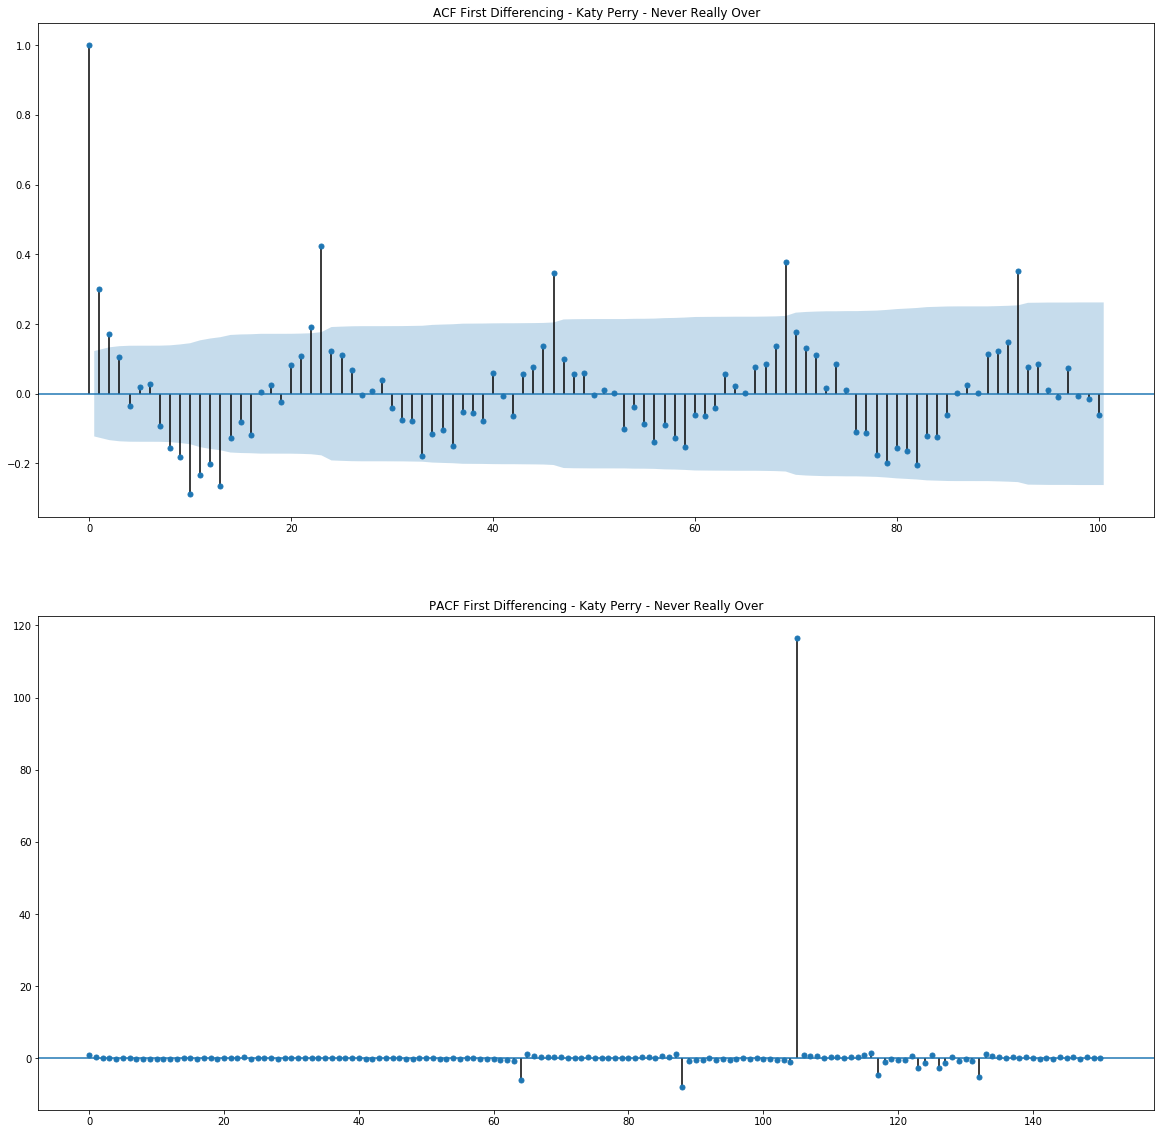

In [10]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=100, ax=ax1, title=('ACF First Differencing - '+str(list_of_test_songs[0])))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=150, ax=ax2, title=('PACF First Differencing - '+str(list_of_test_songs[0])))

In [11]:
# Differencing before testing stationany
second_diff = first_diff - first_diff.shift(1)
second_diff = second_diff.dropna(inplace = False)

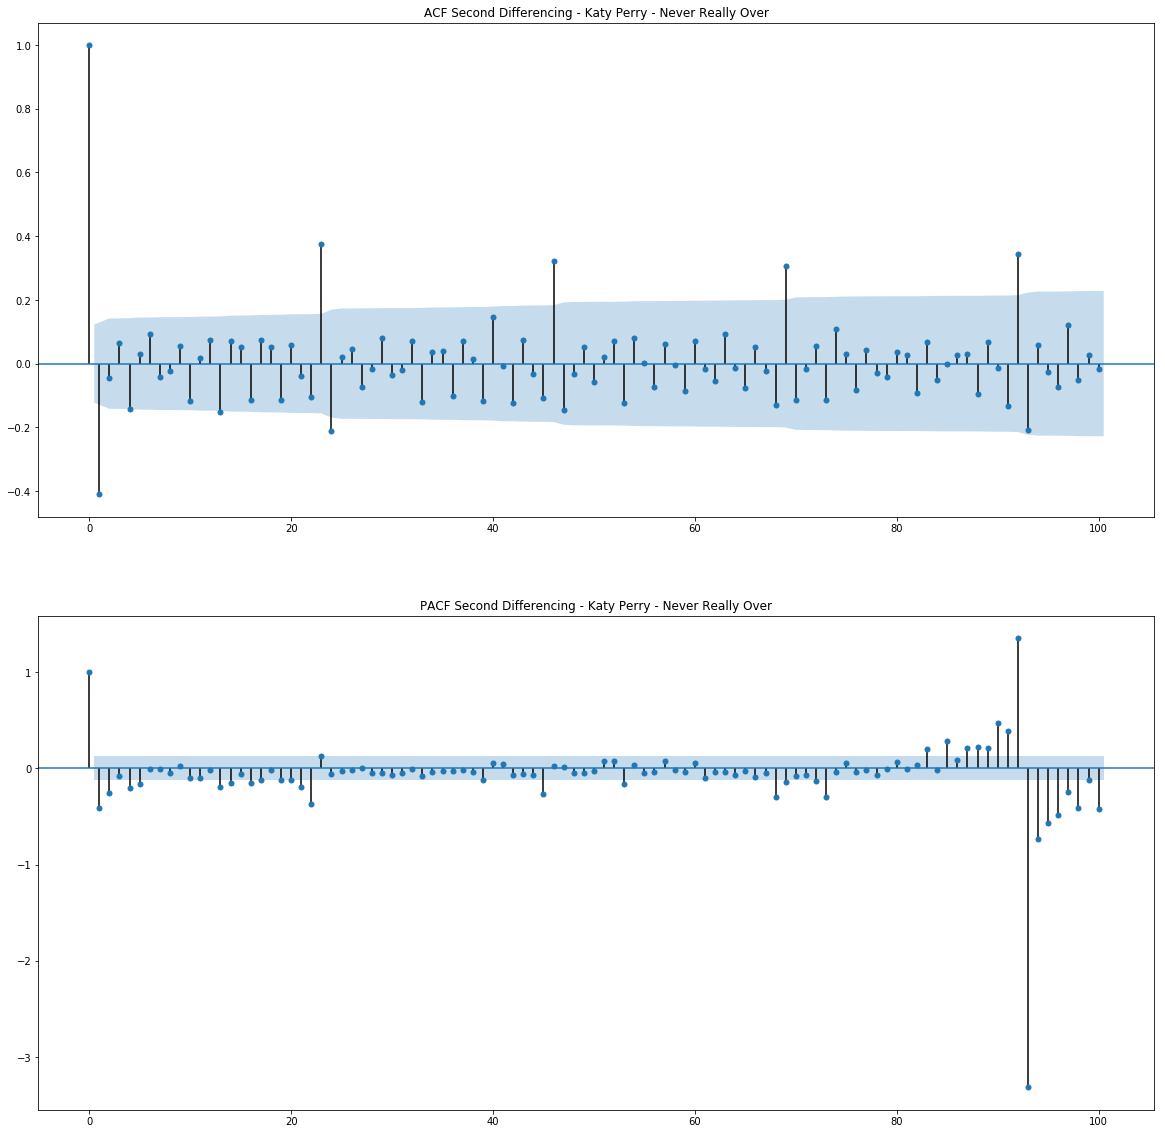

In [12]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(second_diff, lags=100, ax=ax1, title=('ACF Second Differencing - '+str(list_of_test_songs[0])))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(second_diff, lags=100, ax=ax2, title=('PACF Second Differencing - '+str(list_of_test_songs[0])))

[0, 250, -1, 1]

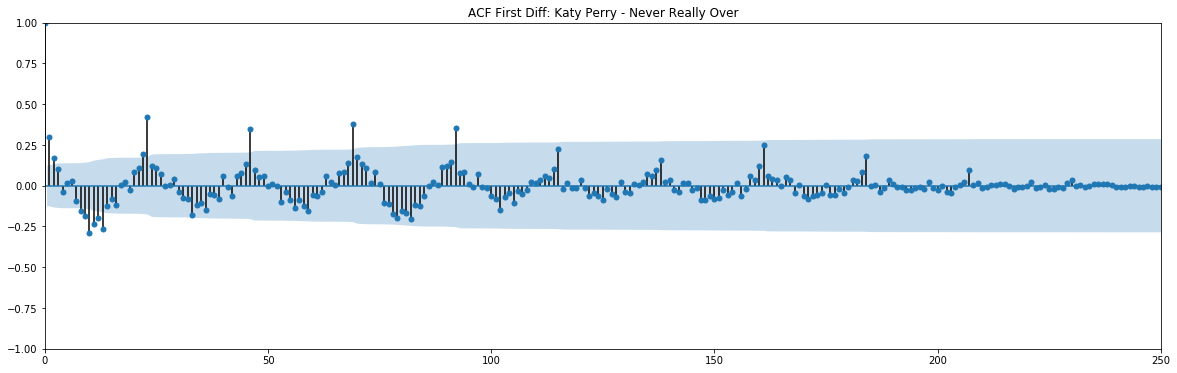

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

N, M = 20, 6

fig, ax = plt.subplots(figsize=(N, M))
plot_acf(first_diff, lags = lenght-2, ax=ax, title='ACF First Diff: ' + str(list_of_test_songs[0]))
plt.axis([0,250,-1,1])

#pyplot.show()


[150, 250, -2, 2]

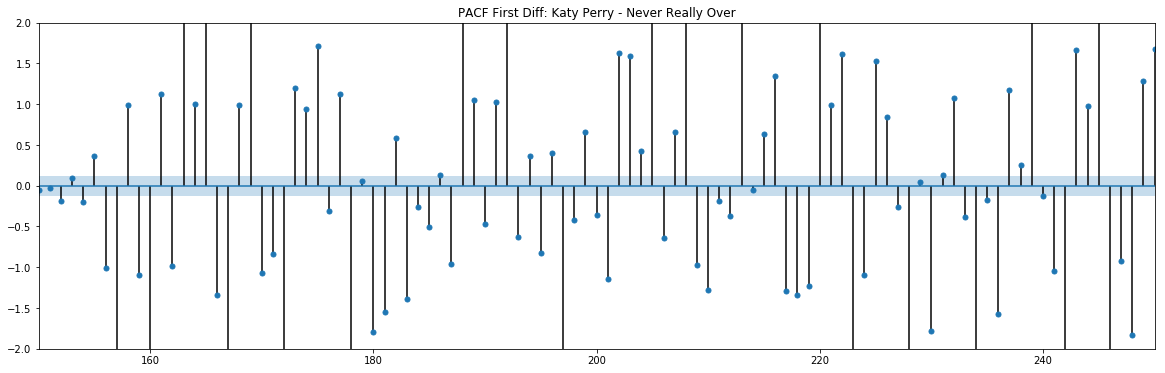

In [14]:
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(first_diff, lags = lenght-2, ax=ax, title='PACF First Diff: ' + str(list_of_test_songs[0]))
plt.axis([150,250,-2,2])

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
order = (2,0,1)
seasonal_order = (0, 0, 0, 23)

# define the model
model = SARIMAX(train_input, order=order, seasonal_order=seasonal_order,  
                enforce_stationarity=False, enforce_invertibility=False)

# fit the model
model_fit = model.fit(disp=False)

# make forecast
yhat = model_fit.predict(len(train_input), len(train_input)+n_steps_out-1)

yhat

array([4194.71410009, 4271.77309263, 4271.06155454, 4224.21139873,
       4150.49345522, 4061.6344327 , 3964.75714485, 3864.17518519,
       3762.48836252, 3661.25132406, 3561.38165454, 3463.40895335,
       3367.62684578, 3274.18574645, 3183.14945859, 3094.52969972,
       3008.30715405, 2924.44430173, 2842.89322904])

In [16]:
# Create variable for each song, used to compare predicted and true value
lst1 = test_output, yhat

# Label weekly or daily
daysOrWeeks = 'Weeks'

# Make dataset of test song variables
df1 = pd.DataFrame(lst1).T
df1.columns = ['True', 'Predicted']
df1[daysOrWeeks] = df1.index + n_steps_in
df1.set_index(daysOrWeeks,inplace=True)


In [17]:
# Forecast Error (or Residual Forecast Error)
forecast_errors = test_output-yhat
#print('Forecast Errors: %s' % forecast_errors)  

df_result = pd.DataFrame(columns=['Song', 'Date', 'Bias', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSPE', 'Predict_from', 'Predict_to', 'order', 'seasonal_order'])

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_square_percentage_error(y_true, y_pred):
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100
    return loss


# Mean Forecast Error (or Forecast Bias), Mean Absolute Error, Mean Squared Error, Root Mean Squared Error  
bias = mean(forecast_errors)
mae = mean(abs(forecast_errors))
mape = mean_absolute_percentage_error(test_output, yhat)
mse = mean_squared_error(test_output, yhat) 
rmse = sqrt(mse)
rmspe = root_mean_square_percentage_error(test_output, yhat)
df_result = df_result.append({'Song':list_of_test_songs[0], 'Date': date.today(), 'Bias': bias, 'MAE': mae, 'MAPE': mape, 'MSE': mse, 'RMSE': rmse, 'RMSPE': rmspe, 'Predict_from':n_steps_in, 'Predict_to': number_of_total_days, 'order':order, 'seasonal_order':seasonal_order},  ignore_index=True)

print('Bias: %f' % bias)
print('MAE: %f' % mae)
print('MAPE: %f'% mape)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)
print('RMSPE %f' % rmspe)
print('_________________________')

# Datetime to use for saving results
now = datetime.datetime.now()
now = str(now.strftime("%Y-%m-%d %H:%M:%S"))

# Save reulsts to CSV in folder
#df_result.to_csv(folder_name+'/'+identify+'_'+now+'.csv', sep=';', decimal=',' )
df_result


Bias: -508.867742
MAE: 1304.835244
MAPE: 105.504674
MSE: 2240612.696125
RMSE: 1496.867628
RMSPE 161.992404
_________________________


,Song,Date,Bias,MAE,MAPE,MSE,RMSE,RMSPE,Predict_from,Predict_to,order,seasonal_order
0,Katy Perry - Never Really Over,2020-06-04,-508.867742,1304.835244,105.504674,2.240613e+06,1496.867628,161.992404,4,23,"(2, 0, 1)","(0, 0, 0, 23)"


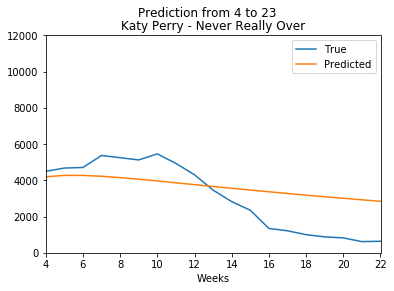

Song:  Katy Perry - Never Really Over
Prediction from 4 to 23
________________________________________________________________


In [18]:
# Define plotting of graphs and saving them to folder
pred_title = "Prediction from "+ str(n_steps_in)+" to "+str(number_of_total_days)
fig_size = 12000

df1.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs[0])
plt.suptitle(pred_title)
#plt.savefig(folder_name+'/'+list_of_test_songs[0]+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs[0])
print(pred_title)
print('________________________________________________________________')
